# Ford Car Price Prediction

In this notebook we are going to use a dataset that contains different informations about Ford models and their prices. We will explore and clean the dataset and then using sklearn library we will split the data into training and test and we will use two regressions models (linear and forest regression models) to make predictions about the car prices.
<br>
<br>
**You can find my article in medium where I explain step by step my process. <br>
https://medium.com/@ritaaggelou/train-test-split-in-python-a-step-by-step-guide-with-example-for-accurate-model-evaluation-53741204ff7d**

In [1]:
# import required libraries
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import linear_model
from sklearn.model_selection import train_test_split


# Cleaning Dataset

In [2]:
df = pd.read_csv('/kaggle/input/ford-car-price-prediction/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [4]:
# checking for Null Values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


In [6]:
# checking for negative values in price
(df['price'] < 0).sum()

0

In [7]:
# rearrange columns
df = df.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 2]]
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4,8999
17962,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0,7499
17963,Focus,2015,Manual,7010,Diesel,20,67.3,1.6,9999
17964,KA,2018,Manual,5007,Petrol,145,57.7,1.2,8299


In [8]:
# checking for duplicates
df.duplicated().sum()

154

In [9]:
#dropping duplicate values
df = df.drop_duplicates().reset_index(drop=True)
df

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500
...,...,...,...,...,...,...,...,...,...
17807,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4,8999
17808,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0,7499
17809,Focus,2015,Manual,7010,Diesel,20,67.3,1.6,9999
17810,KA,2018,Manual,5007,Petrol,145,57.7,1.2,8299


In [10]:
#checking for miswriting in categorical values
list=['model','transmission','fuelType']
for i in list:
  print("Unique values for",i,":", df[i].unique())

Unique values for model : [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
Unique values for transmission : ['Automatic' 'Manual' 'Semi-Auto']
Unique values for fuelType : ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


# Preparing Dataset for Machine Learning

In [11]:
# separate features from target value
X=df.drop(['price'],axis=1)
y=df['price']
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17807,B-MAX,2017,Manual,16700,Petrol,150,47.1,1.4
17808,B-MAX,2014,Manual,40700,Petrol,30,57.7,1.0
17809,Focus,2015,Manual,7010,Diesel,20,67.3,1.6
17810,KA,2018,Manual,5007,Petrol,145,57.7,1.2


In [12]:
# encode categorical data
le=LabelEncoder()
list=['model','transmission','fuelType']
for i in list:
  X[i]=le.fit_transform(X[i])
  print("Unique categorical values for",i,":", df[i].unique())
  print("Unique numerical values for",i,":", X[i].unique())
  print("")
  

Unique categorical values for model : [' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
Unique numerical values for model : [ 5  6 16 13  2  1 14 12 21 18  0  3 20  9 11  8 15 10  7 17 19  4 22 23]

Unique categorical values for transmission : ['Automatic' 'Manual' 'Semi-Auto']
Unique numerical values for transmission : [0 1 2]

Unique categorical values for fuelType : ['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']
Unique numerical values for fuelType : [4 0 2 1 3]



In [13]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0
...,...,...,...,...,...,...,...,...
17807,0,2017,1,16700,4,150,47.1,1.4
17808,0,2014,1,40700,4,30,57.7,1.0
17809,6,2015,1,7010,0,20,67.3,1.6
17810,11,2018,1,5007,4,145,57.7,1.2


In [14]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(14249, 8) (14249,)
(3563, 8) (3563,)


# Building and Evaluating Models
## 1. Linear Regression Model

In [15]:
# Instantiate the linear regression model
lin_model = linear_model.LinearRegression()
# Fit the linear regression model
lin_model.fit(X_train, y_train)
y_pred_l = lin_model.predict(X_test)

In [16]:
#predict the price of a car:
predictedprice = lin_model.predict([[5, 2017, 0, 15000, 3, 150, 57, 1.5]])

print(predictedprice.round(2))

[13819.6]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
# print the model equation
print("Intercept: ", lin_model.intercept_)
print("")
print("Coefficients:")
print(X.columns, lin_model.coef_)

Intercept:  -2497784.3508387324

Coefficients:
Index(['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object') [ 3.48568914e+01  1.24573650e+03 -2.83782602e+02 -5.61453680e-02
 -2.92344270e+02  9.33433551e-01 -1.05062528e+02  4.23127129e+03]


### Evaluation

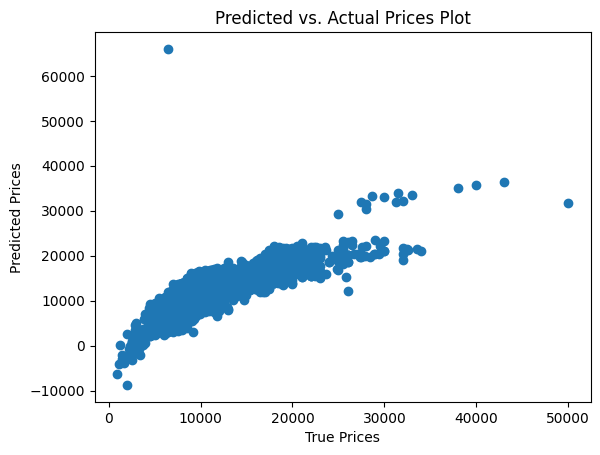

In [18]:
# Predicted vs. Actual Plot
plt.scatter(y_test, y_pred_l)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title('Predicted vs. Actual Prices Plot')
plt.savefig('Predicted vs. Actual Prices Plot-Linear.png')

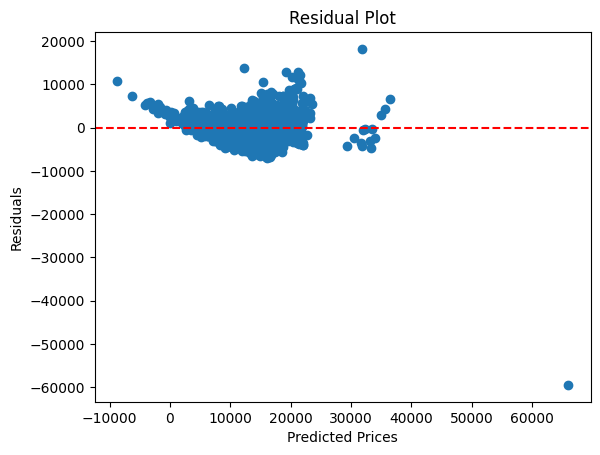

In [19]:
# Residual Plot
residuals = y_test - y_pred_l
plt.scatter(y_pred_l, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('Residual Plot-linear.png')
plt.show()

In [20]:
# Measure Score
print("Score for Linear Regression Model is:", lin_model.score(X_test, y_test).round(2))

Score for Linear Regression Model is: 0.71


## Forest Regression Model

In [21]:
# Instantiate the RandomForestClassifier
forest_model = RandomForestRegressor(n_estimators=100)
# Fit the RandomForestClassifier
forest_model.fit(X_train,y_train)
# prediction on Test Data
y_pred_f = forest_model.predict(X_test)

### Evaluation

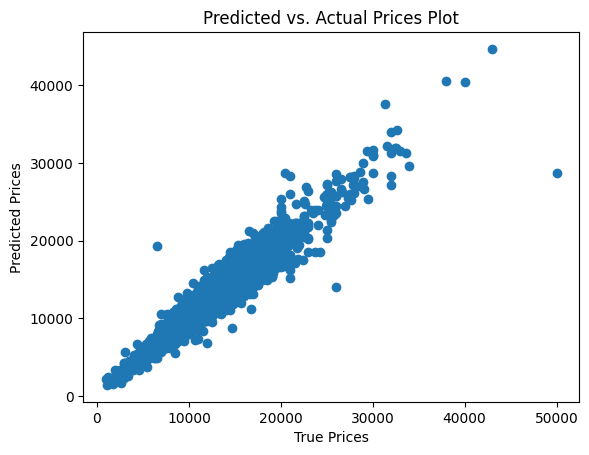

In [22]:
# Predicted vs. Actual Plot
plt.scatter(y_test, y_pred_f)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title('Predicted vs. Actual Prices Plot')
plt.savefig('Predicted vs. Actual Prices Plot-Forest.png')

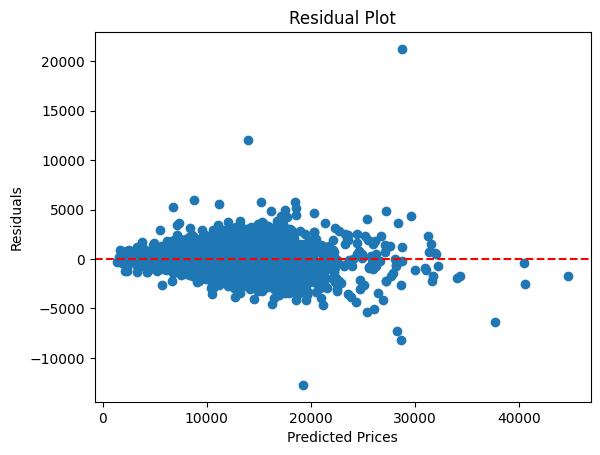

In [23]:
# Residual Plot
residuals = y_test - y_pred_f
plt.scatter(y_pred_f, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.savefig('Residual Plot-Forest.png')
plt.show()

In [24]:
# Measure Score
print("Score for Forest Regression Model is:", forest_model.score(X_test, y_test).round(2))

Score for Forest Regression Model is: 0.93


# Comparison and Conclusion
* **Linear Regression (R² = 0.71):** Works but is less accurate due to limitations in capturing complex patterns.
* **Random Forest Regression (R² = 0.93):** Performs significantly better due to its ability to handle non-linearity and interactions between variables. 